# Answer 1:

Wine Quality Data Set

This is one of the most popular datasets along data science beginners.It is divided into 2 datasets. There are 4898
rows and 12 columns in this dataset.
Read the data from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

# Answer 2:

From the above dataset, the objective of this project is to develop a Data Centric ML Model through which the Quality 
of WINE can be predicted.

# Identifying Last Two digit for the Assignment Guideline

In [1]:
id = 20216039
print('My Id is:', id, '.','The last digit of my ID is:', str(id)[-2:])
Mod = 39%2
print('The Modulo of the last two digit of my ID is', Mod, '.', '\nMy assignment Dataset is Wine Quality Data.')

My Id is: 20216039 . The last digit of my ID is: 39
The Modulo of the last two digit of my ID is 1 . 
My assignment Dataset is Wine Quality Data.


# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as mt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
df=pd.read_csv('winedata.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2037 non-null   float64
 1   volatile.acidity      2037 non-null   float64
 2   citric.acid           2037 non-null   float64
 3   residual.sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free.sulfur.dioxide   2037 non-null   float64
 6   total.sulfur.dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   float64
 11  quality               2037 non-null   int64  
 12  rt.sulfur.dioxide     2037 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 207.0 KB


In [4]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,rt.sulfur.dioxide
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6,5.000000
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6,7.681146
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7,6.324555
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5,4.898979
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6,6.000000


# Answer 3:

# Necessity of Dropping rt.sulfur.dioxide (As Assignment guideline provides 12 Columns & The Dataset Contains 13 Columns)

In [5]:
df.drop(['rt.sulfur.dioxide'], axis =1, inplace =True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2037 non-null   float64
 1   volatile.acidity      2037 non-null   float64
 2   citric.acid           2037 non-null   float64
 3   residual.sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free.sulfur.dioxide   2037 non-null   float64
 6   total.sulfur.dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   float64
 11  quality               2037 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 191.1 KB


# Appending Dataset According to the Assignment Guideline

In [7]:
# List of data series
datarowsSeries = [pd.Series([7.8+.39,.88+.39,0.00+.39,1.9,0.09+.39,25.0+.39,67.0+.39,.991+.39,3.22,0.68+.39,9.8+.39,5], index=df.columns ), pd.Series([7.2+.39,.83+.39,0.01+.39,2.2,0.19+.39,15.0+.39,60.0+.39,.996+.39,3.52,0.55+.39,9.6+.39,6], index=df.columns ), pd.Series([7.9+.39,.89+.39,0.01+.39,1.7,0.08+.39,22.0+.39,57.0+.39,.997+.39,3.26,0.64+.39,9.8+.39,2], index=df.columns ), pd.Series([7.7+.39,.86+.39,0.02+.39,2.3,0.07+.39,11.0+.39,38.0+.39,.994+.39,3.12,0.08+.39,9.4+.39,3], index=df.columns ) ]

# Check The DF For Verifying Newly Appended Data

In [8]:
df.iloc[-4:]

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2033,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6
2034,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,7
2035,7.7,0.28,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.6,5
2036,5.7,0.22,0.28,1.3,0.027,26.0,101.0,0.98948,3.35,0.38,12.5,7


# New Appended DF named new_data

In [9]:
new_data = df.append(datarowsSeries, ignore_index=True)

In [10]:
new_data.iloc[-8:]


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
2033,7.40,0.19,0.31,14.5,0.045,39.00,193.00,0.99860,3.10,0.50,9.20,6.0
2034,6.70,0.36,0.26,7.9,0.034,39.00,123.00,0.99119,2.99,0.30,12.20,7.0
2035,7.70,0.28,0.35,15.3,0.056,31.00,117.00,0.99980,3.27,0.50,9.60,5.0
2036,5.70,0.22,0.28,1.3,0.027,26.00,101.00,0.98948,3.35,0.38,12.50,7.0
2037,8.19,1.27,0.39,1.9,0.480,25.39,67.39,1.38100,3.22,1.07,10.19,5.0
2038,7.59,1.22,0.40,2.2,0.580,15.39,60.39,1.38600,3.52,0.94,9.99,6.0
2039,8.29,1.28,0.40,1.7,0.470,22.39,57.39,1.38700,3.26,1.03,10.19,2.0
2040,8.09,1.25,0.41,2.3,0.460,11.39,38.39,1.38400,3.12,0.47,9.79,3.0


In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         2041 non-null   float64
 1   volatile.acidity      2041 non-null   float64
 2   citric.acid           2041 non-null   float64
 3   residual.sugar        2041 non-null   float64
 4   chlorides             2041 non-null   float64
 5   free.sulfur.dioxide   2041 non-null   float64
 6   total.sulfur.dioxide  2041 non-null   float64
 7   density               2041 non-null   float64
 8   pH                    2041 non-null   float64
 9   sulphates             2041 non-null   float64
 10  alcohol               2041 non-null   float64
 11  quality               2041 non-null   float64
dtypes: float64(12)
memory usage: 191.5 KB


# Changed Column Name for Ease

In [12]:
new_data.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'   ]

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2041 non-null   float64
 1   volatile_acidity      2041 non-null   float64
 2   citric_acid           2041 non-null   float64
 3   residual_sugar        2041 non-null   float64
 4   chlorides             2041 non-null   float64
 5   free_sulfur_dioxide   2041 non-null   float64
 6   total_sulfur_dioxide  2041 non-null   float64
 7   density               2041 non-null   float64
 8   pH                    2041 non-null   float64
 9   sulphates             2041 non-null   float64
 10  alcohol               2041 non-null   float64
 11  quality               2041 non-null   float64
dtypes: float64(12)
memory usage: 191.5 KB


# Answer 4:

# Suitable Plotting, Data Visualization

<AxesSubplot:>

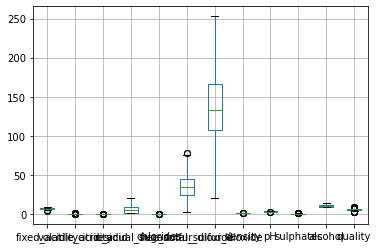

In [14]:
new_data.boxplot()

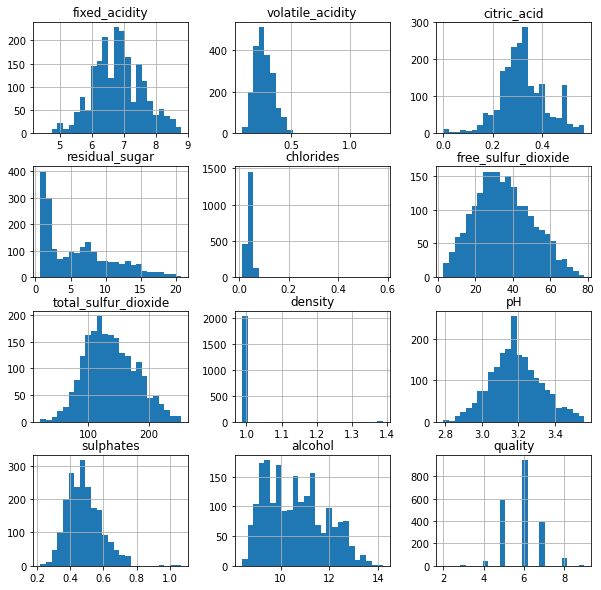

In [15]:
new_data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

# Checked Specific Column for Better Visualization

<AxesSubplot:>

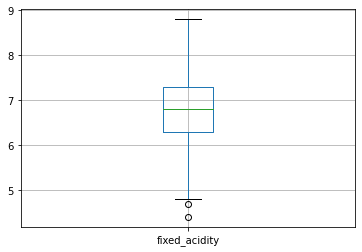

In [16]:
new_data.boxplot('fixed_acidity')

# Found Outlier in The fixed_acidity Column. No action taken according to the assignment guideline.

# Steps for volatile_acidity Column

<AxesSubplot:>

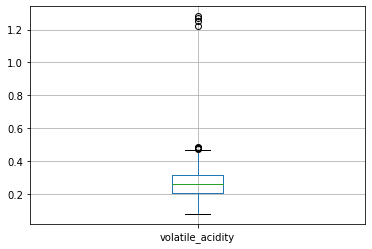

In [17]:
new_data.boxplot('volatile_acidity')

# Found Outlier in The volatile_acidity Column. No action taken according to the assignment guideline.

# Steps for citric_acid Column

<AxesSubplot:>

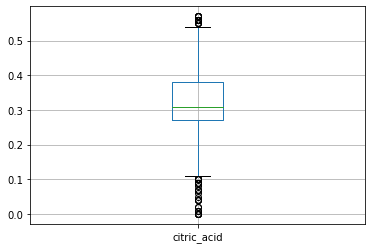

In [18]:
new_data.boxplot('citric_acid')

# Found Outlier in The citric_acid Column. No action taken according to the assignment guideline.

# Steps for residual_sugar Column. (No Outlier Found.) 

<AxesSubplot:>

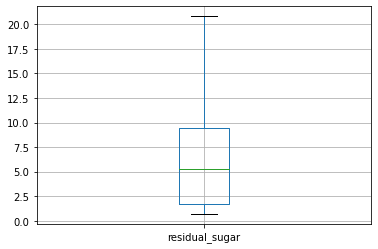

In [19]:
new_data.boxplot('residual_sugar')


# Steps for chlorides Column 

<AxesSubplot:>

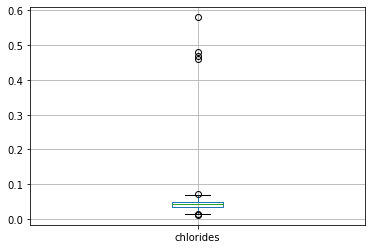

In [20]:
new_data.boxplot('chlorides')


# Found Outlier in The chlorides Column . No action taken according to the assignment guideline.

# Steps for free_sulfur_dioxide Column

<AxesSubplot:>

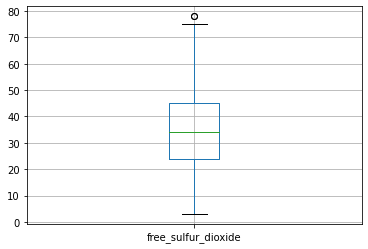

In [21]:
new_data.boxplot('free_sulfur_dioxide')

# Found Outlier in The  free_sulfur_dioxide Column . No action taken according to the assignment guideline.

# Steps for total_sulfur_dioxide Column . (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

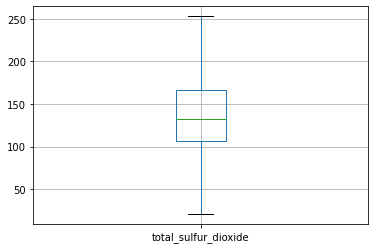

In [22]:
new_data.boxplot('total_sulfur_dioxide')

# Steps for density Column.

<AxesSubplot:>

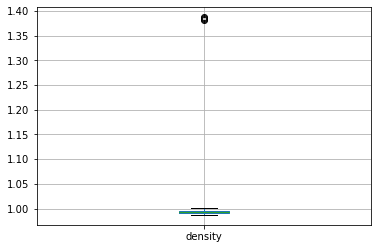

In [23]:
new_data.boxplot('density')

# Found Outlier in The  density Column . No action taken according to the assignment guideline.

# Steps for pH Column

<AxesSubplot:>

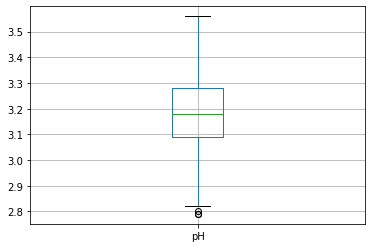

In [24]:
new_data.boxplot('pH')

# Found Outlier in The  pH Column. No action taken according to the assignment guideline.

# Steps for sulphates Column

<AxesSubplot:>

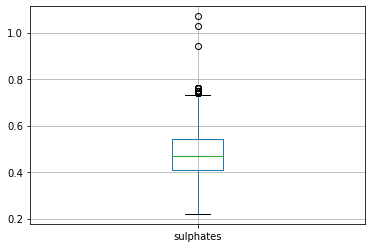

In [25]:
new_data.boxplot('sulphates')

# Found Outlier in The  sulphates Column. No action taken according to the assignment guideline.

# Steps for alcohol Column. (No Outlier Found.) Continue to next Column.

<AxesSubplot:>

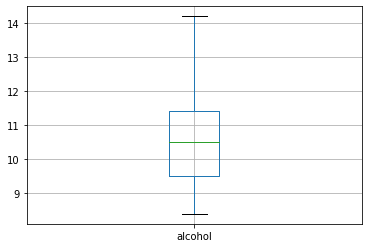

In [26]:
new_data.boxplot('alcohol')

# Exploring the Processed Dataset

In [27]:
# Now, let's check the information about different variables/column from the dataset:
new_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000
mean,6.828006,0.268506,0.323351,6.269255,0.043103,34.687438,136.786654,0.994579,3.186531,0.481832,10.597676,5.926017
std,0.754573,0.088262,0.094347,4.866159,0.022571,15.219130,41.541262,0.017518,0.138781,0.100576,1.221913,0.852283
min,4.400000,0.080000,0.000000,0.700000,0.012000,3.000000,21.000000,0.987110,2.790000,0.220000,8.400000,2.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,24.000000,107.000000,0.991530,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.042000,34.000000,133.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.315000,0.380000,9.400000,0.049000,45.000000,166.000000,0.995800,3.280000,0.540000,11.433333,6.000000
max,8.800000,1.280000,0.570000,20.800000,0.580000,78.000000,253.000000,1.387000,3.560000,1.070000,14.200000,9.000000


In [28]:
new_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploring the Target Variable (Data of quality Column)

In [29]:
new_data.quality.value_counts().sort_index()

2.0      1
3.0      4
4.0     40
5.0    590
6.0    945
7.0    391
8.0     66
9.0      4
Name: quality, dtype: int64

In [30]:
new_data['quality'].unique()

array([6., 7., 5., 4., 8., 9., 3., 2.])

In [31]:
new_data['quality']

0       6.0
1       6.0
2       7.0
3       5.0
4       6.0
       ... 
2036    7.0
2037    5.0
2038    6.0
2039    2.0
2040    3.0
Name: quality, Length: 2041, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='count'>

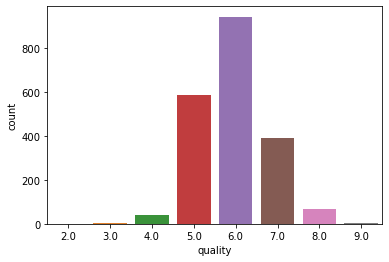

In [32]:
sns.countplot(x='quality', data=new_data)

In [33]:

new_data['quality'].value_counts()



6.0    945
5.0    590
7.0    391
8.0     66
4.0     40
3.0      4
9.0      4
2.0      1
Name: quality, dtype: int64

In [34]:
new_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000,2041.000000
mean,6.828006,0.268506,0.323351,6.269255,0.043103,34.687438,136.786654,0.994579,3.186531,0.481832,10.597676,5.926017
std,0.754573,0.088262,0.094347,4.866159,0.022571,15.219130,41.541262,0.017518,0.138781,0.100576,1.221913,0.852283
min,4.400000,0.080000,0.000000,0.700000,0.012000,3.000000,21.000000,0.987110,2.790000,0.220000,8.400000,2.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,24.000000,107.000000,0.991530,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.042000,34.000000,133.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.315000,0.380000,9.400000,0.049000,45.000000,166.000000,0.995800,3.280000,0.540000,11.433333,6.000000
max,8.800000,1.280000,0.570000,20.800000,0.580000,78.000000,253.000000,1.387000,3.560000,1.070000,14.200000,9.000000


# Bivariate Analysis (Checking the relationship of entities with Target Variable Quality)

# Fixed Acidity vs Quality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


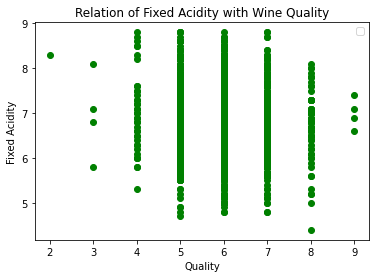

In [35]:
plt.scatter(new_data['quality'], new_data['fixed_acidity'], color = 'green')
plt.title('Relation of Fixed Acidity with Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

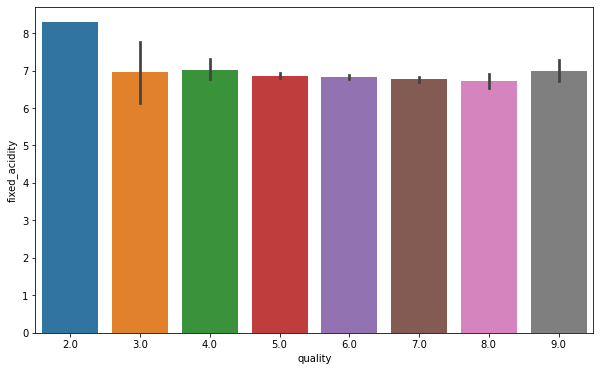

In [36]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = new_data)

# Alcohol vs Quality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


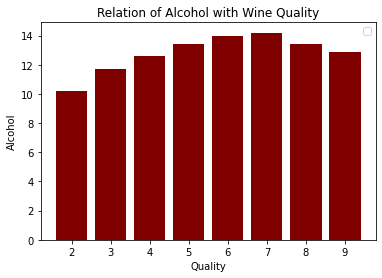

In [37]:
plt.bar(new_data['quality'], new_data['alcohol'], color = 'maroon')
plt.title('Relation of Alcohol with Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

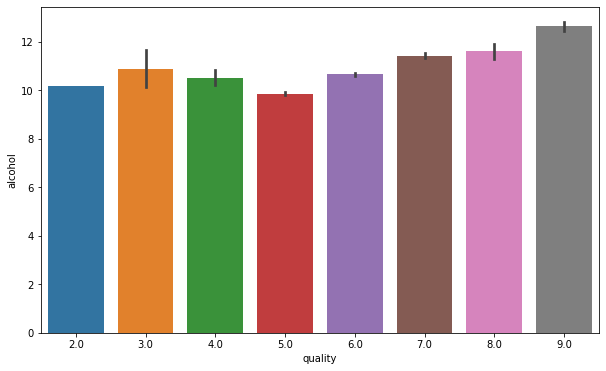

In [38]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = new_data)

# Volatile Acidity vs Quality

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

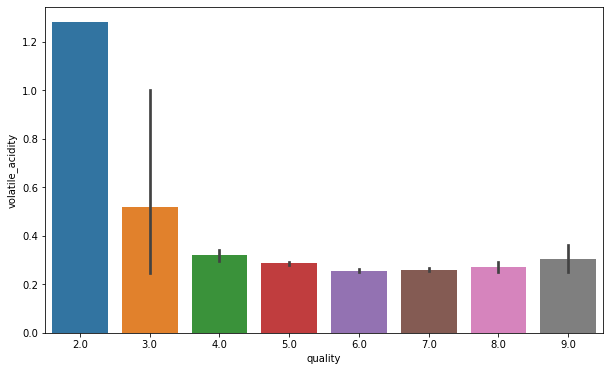

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = new_data)

# Citric Acid vs Quality

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

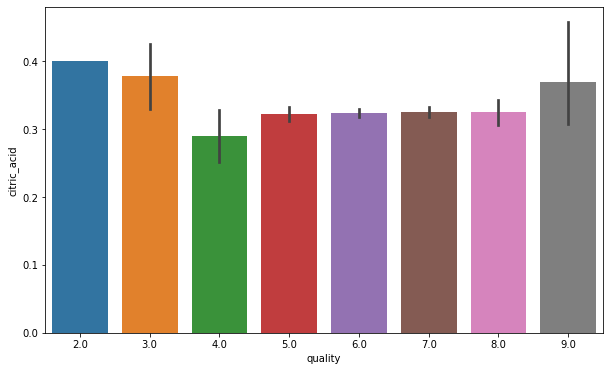

In [40]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = new_data)

# Residual Sugar vs Quality

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

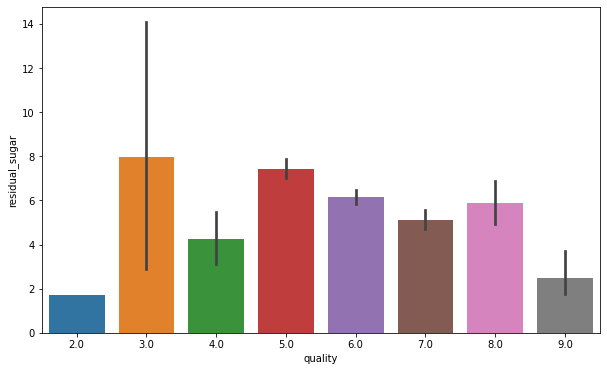

In [41]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = new_data)

# Free Sulfur Dioxide Vs Quality

<AxesSubplot:xlabel='quality', ylabel='free_sulfur_dioxide'>

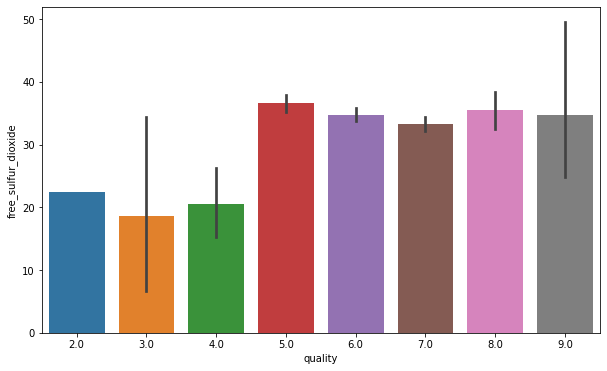

In [42]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = new_data)

# Total Sulfur Dioxide Vs Quality

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

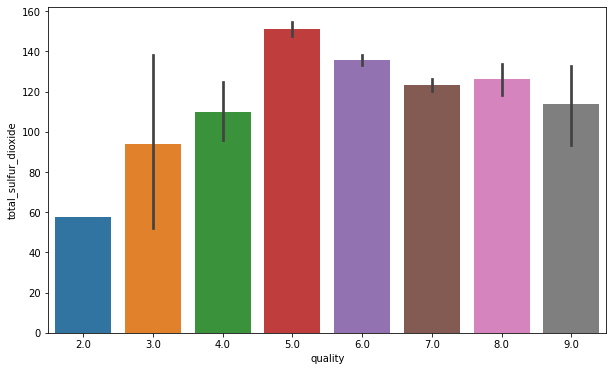

In [43]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = new_data)

# Sulphates vs Quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

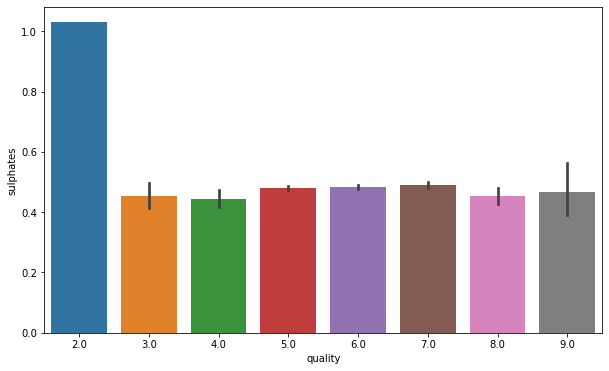

In [44]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = new_data)

# Density vs Quality

<AxesSubplot:xlabel='quality', ylabel='density'>

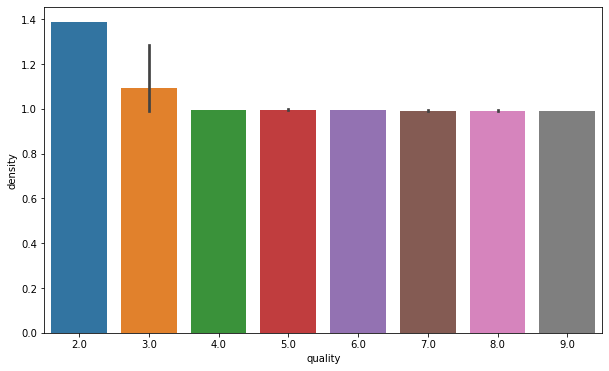

In [45]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = new_data)

# pH vs Quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

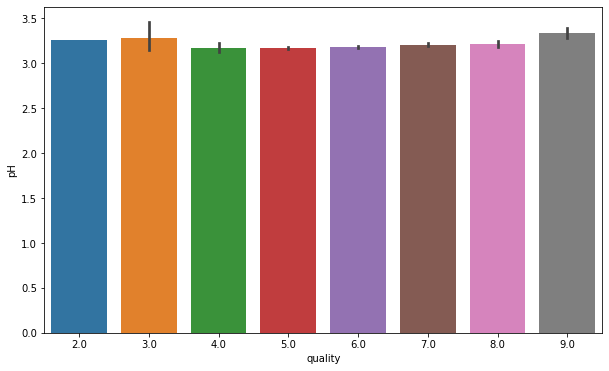

In [46]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = new_data)

# Chloride vs Quality

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

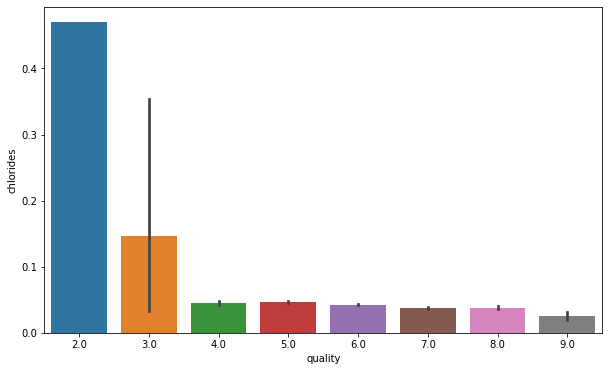

In [47]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = new_data)

# Here we can see that like the above two items do not have very strong relation to the dependent variable we have to showcase a correlation plot to check which of the items are more related to the dependent variable and which items are less related to the dependent variables.

# Answer 5:

# Selecting Dependent and Independent Variable

In [48]:
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6.0
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6.0
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7.0
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5.0
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6.0


# Labelling Quality using Certain Condition

Now, Let's reallocate the quality of wine as 0: 0 to 5 (Average quality) and 1: 6 to 10 (Good quality) from existing 'quality' variable.
    # 0 to 5 (Average quality)
    # 1: 6 to 10 (Good quality)

In [49]:
new_data['quality'] = [0 if x <= 5 else 1 for x in new_data['quality']]

In [50]:
new_data['quality'].value_counts()

1    1406
0     635
Name: quality, dtype: int64

In [51]:
new_data['quality'] = new_data['quality'].map({0:'Average', 1:'Good'})

In [52]:
new_data['quality'].value_counts()

Good       1406
Average     635
Name: quality, dtype: int64

In [53]:
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,Good
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,Good
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,Good
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,Average
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,Good


# Label Encoding on Categorical Values

In [54]:
# converting the probable categorical value into binary form for ease of operation
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
new_data['quality'] = lb.fit_transform(new_data['quality'])
print(new_data['quality'])

0       1
1       1
2       1
3       0
4       1
       ..
2036    1
2037    0
2038    1
2039    0
2040    0
Name: quality, Length: 2041, dtype: int32


C:\Users\manoj\anaconda3\envs\juds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

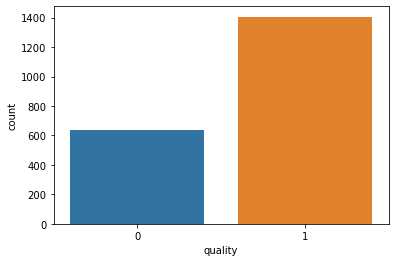

In [55]:
sns.countplot(new_data['quality'])

# Checking Processed DataSet Status

In [56]:
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,1
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,1
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,1
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,0
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,1


In [57]:
X = new_data.drop("quality",axis=1)

In [58]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.50,0.33,0.32,11.1,0.036,25.00,119.00,0.99620,3.15,0.34,10.50
1,6.30,0.27,0.29,12.2,0.044,59.00,196.00,0.99782,3.14,0.40,8.80
2,7.00,0.30,0.51,13.6,0.050,40.00,168.00,0.99760,3.07,0.52,9.60
3,7.40,0.38,0.27,7.5,0.041,24.00,160.00,0.99535,3.17,0.43,10.00
4,8.10,0.12,0.38,0.9,0.034,36.00,86.00,0.99026,2.80,0.55,12.00
...,...,...,...,...,...,...,...,...,...,...,...
2036,5.70,0.22,0.28,1.3,0.027,26.00,101.00,0.98948,3.35,0.38,12.50
2037,8.19,1.27,0.39,1.9,0.480,25.39,67.39,1.38100,3.22,1.07,10.19
2038,7.59,1.22,0.40,2.2,0.580,15.39,60.39,1.38600,3.52,0.94,9.99
2039,8.29,1.28,0.40,1.7,0.470,22.39,57.39,1.38700,3.26,1.03,10.19


In [59]:
y = new_data["quality"] 

In [60]:
y

0       1
1       1
2       1
3       0
4       1
       ..
2036    1
2037    0
2038    1
2039    0
2040    0
Name: quality, Length: 2041, dtype: int32

In [61]:
new_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,1
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,1
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,1
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,0
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,1


# Separate dataset into train and test

In [62]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape



((1428, 11), (613, 11))

In [63]:
X_train.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,-0.051385,0.227084,0.056966,0.091914,-0.045172,0.043878,0.113393,-0.402376,0.021895,-0.123096
volatile_acidity,-0.051385,1.000000,-0.130374,0.069165,0.238197,-0.055189,0.056822,0.316719,-0.016707,0.039358,0.101045
citric_acid,0.227084,-0.130374,1.000000,0.071305,0.029437,0.089565,0.106900,0.047979,-0.130977,0.059912,-0.026552
residual_sugar,0.056966,0.069165,0.071305,1.000000,0.165936,0.346436,0.431833,0.199698,-0.178468,-0.028943,-0.479890
chlorides,0.091914,0.238197,0.029437,0.165936,1.000000,0.095469,0.220436,0.812733,-0.009622,0.168652,-0.384005
free_sulfur_dioxide,-0.045172,-0.055189,0.089565,0.346436,0.095469,1.000000,0.644727,0.070500,-0.012678,0.029419,-0.267487
total_sulfur_dioxide,0.043878,0.056822,0.106900,0.431833,0.220436,0.644727,1.000000,0.102492,-0.005769,0.141399,-0.489106
density,0.113393,0.316719,0.047979,0.199698,0.812733,0.070500,0.102492,1.000000,-0.009424,0.170959,-0.226934
pH,-0.402376,-0.016707,-0.130977,-0.178468,-0.009622,-0.012678,-0.005769,-0.009424,1.000000,0.142831,0.124862
sulphates,0.021895,0.039358,0.059912,-0.028943,0.168652,0.029419,0.141399,0.170959,0.142831,1.000000,-0.098594


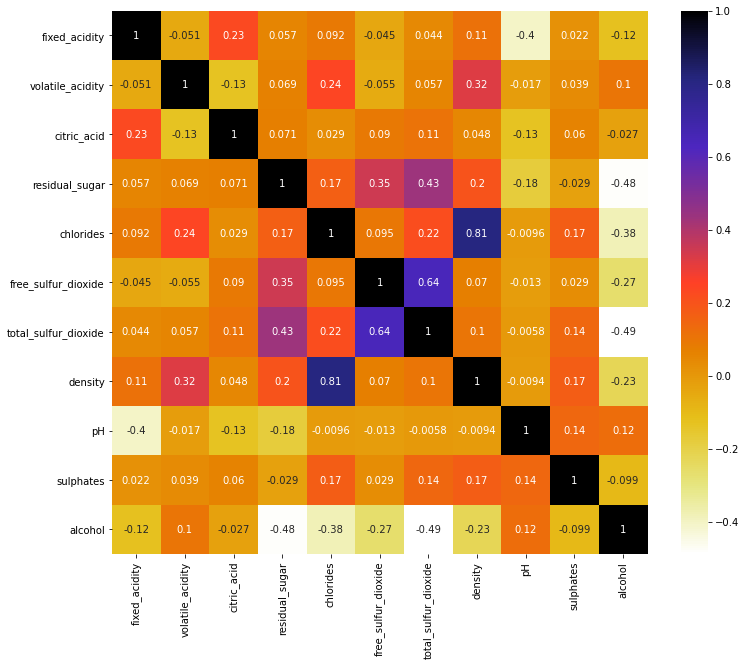

In [64]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [65]:


# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



In [66]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [67]:
corr_features

{'density'}

# Getting Rid of the Highly Co-related Features

In [68]:
X_train_final = X_train.drop(corr_features,axis=1)
X_test_final =X_test.drop(corr_features,axis=1)

# Finding the co-relation with Target Variable

In [69]:
X_train_final.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
fixed_acidity,1.000000,-0.051385,0.227084,0.056966,0.091914,-0.045172,0.043878,-0.402376,0.021895,-0.123096
volatile_acidity,-0.051385,1.000000,-0.130374,0.069165,0.238197,-0.055189,0.056822,-0.016707,0.039358,0.101045
citric_acid,0.227084,-0.130374,1.000000,0.071305,0.029437,0.089565,0.106900,-0.130977,0.059912,-0.026552
residual_sugar,0.056966,0.069165,0.071305,1.000000,0.165936,0.346436,0.431833,-0.178468,-0.028943,-0.479890
chlorides,0.091914,0.238197,0.029437,0.165936,1.000000,0.095469,0.220436,-0.009622,0.168652,-0.384005
free_sulfur_dioxide,-0.045172,-0.055189,0.089565,0.346436,0.095469,1.000000,0.644727,-0.012678,0.029419,-0.267487
total_sulfur_dioxide,0.043878,0.056822,0.106900,0.431833,0.220436,0.644727,1.000000,-0.005769,0.141399,-0.489106
pH,-0.402376,-0.016707,-0.130977,-0.178468,-0.009622,-0.012678,-0.005769,1.000000,0.142831,0.124862
sulphates,0.021895,0.039358,0.059912,-0.028943,0.168652,0.029419,0.141399,0.142831,1.000000,-0.098594
alcohol,-0.123096,0.101045,-0.026552,-0.479890,-0.384005,-0.267487,-0.489106,0.124862,-0.098594,1.000000


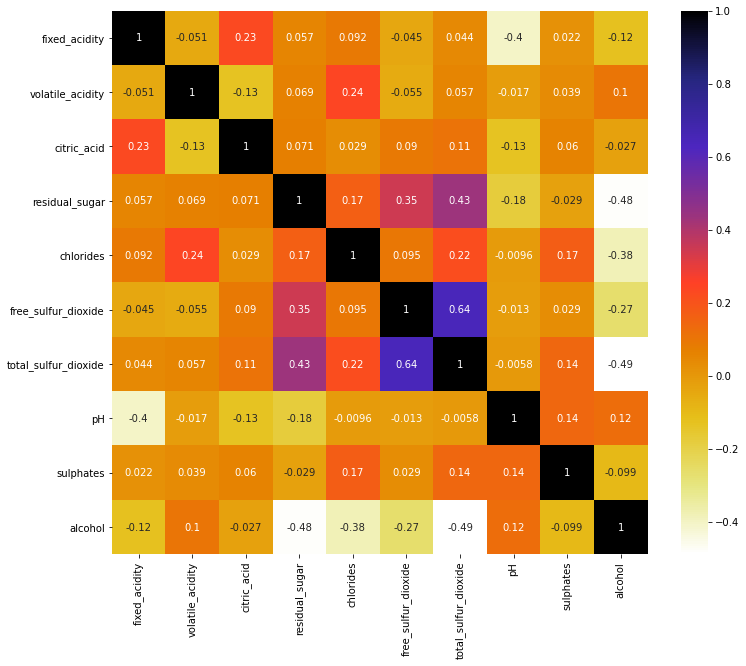

In [70]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [71]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [72]:
corr_features = correlation(X_train_final, 0.7)
len(set(corr_features))

0

In [73]:
corr_features

set()

# None of the column are highly co-related in the perspective of the quality column

In [74]:
X_train_final

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
1437,6.4,0.25,0.37,4.5,0.039,41.0,147.0,3.18,0.40,11.1
539,7.0,0.21,0.34,8.5,0.033,31.0,253.0,3.22,0.56,10.5
1892,6.4,0.46,0.22,14.7,0.047,51.0,183.0,3.39,0.60,10.5
1486,7.2,0.30,0.30,8.1,0.050,40.0,188.0,3.15,0.49,9.1
1444,6.7,0.24,0.30,10.2,0.070,44.0,179.0,2.86,0.46,8.9
...,...,...,...,...,...,...,...,...,...,...
835,6.8,0.23,0.31,2.8,0.047,40.0,122.0,3.06,0.64,10.9
1216,6.7,0.13,0.29,5.3,0.051,31.0,122.0,3.44,0.37,9.7
1653,7.7,0.12,0.32,1.4,0.060,47.0,150.0,3.37,0.42,9.2
559,7.0,0.21,0.28,8.7,0.045,37.0,222.0,3.25,0.54,10.4


# Answer 6:

# Some Hypothesis Tests for some of the columns

#  Hypothesis Test for sulphates

In [75]:
#### Example of the Shapiro-Wilk Normality Test
###### H0: the sample has a Gaussian / Normal distribution.
###### H1: the sample does not have a Gaussian distribution.

from scipy.stats import shapiro
stat, p = shapiro(new_data['sulphates'])

print('stat=%.4f, p=%.4f' % (stat, p))
### p_value < 0.05 , H0 will be rejected
if p < 0.05:
        print('Probably the sample is not Normal')
else:
        print('Probably the sample is Normal')


stat=0.9755, p=0.0000
Probably the sample is not Normal


#  Hypothesis Test for fixed_acidity

In [76]:
#### Example of the Shapiro-Wilk Normality Test
###### H0: the sample has a Gaussian / Normal distribution.
###### H1: the sample does not have a Gaussian distribution.

from scipy.stats import shapiro
stat, p = shapiro(new_data['fixed_acidity'])

print('stat=%.4f, p=%.4f' % (stat, p))
### p_value < 0.05 , H0 will be rejected
if p < 0.05:
        print('Probably the sample is not Normal')
else:
        print('Probably the sample is Normal')


stat=0.9949, p=0.0000
Probably the sample is not Normal


# Parametric statistics are based on assumptions about the distribution of population from which the sample was taken. We can see that The distribution are not normal. But as per the assumtion for Hypothesis test we will Treat them as Normally Distributrd. 

# A confidence interval displays the probability that a parameter will fall between a pair of values around the mean. Confidence intervals measure the degree of uncertainty or certainty in a sampling method. They are most often constructed using confidence levels of 95% or 99%.

# Confidence Interval for Mean of Residual Sugar

In [77]:
###### Confidence Interval for Mean
import math
m = new_data.residual_sugar.mean()
#### Standard Error (SE) calculation
se = new_data.residual_sugar.std()/math.sqrt(len(new_data.residual_sugar))
ci = [m - se*1.96 , m + se *1.96]
print("Confidence interval for mean of Residual Sugar:", ci)

Confidence interval for mean of Residual Sugar: [6.05813940247417, 6.4803711315777655]


# t-test:  whether avg of Residual Sugar is 5 or not.

In [78]:
#### t-test:  whether avg of Residual Sugar is 5 or not.
from scipy.stats import ttest_1samp

residual_sugar_mean = np.mean(new_data.residual_sugar)
print(residual_sugar_mean)
tset, pval = ttest_1samp(new_data.residual_sugar, 5)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("The null hypothesis is rejected.")
else:
  print("we are not rejecting the null hypothesis")


6.269255267025968
p-values 4.690968205587061e-31
The null hypothesis is rejected.


# Z test for mean of Residual Sugar

In [79]:
### Z test for mean

from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(new_data['residual_sugar'], x2=None, value=4)
print(pval)
print('p-value of Z Test =',pval)

1.571627914982395e-98
p-value of Z Test = 1.571627914982395e-98


# z test for proportion of Residual Sugar

In [80]:
########## z test for proportion

from statsmodels.stats.proportion import proportions_ztest
count = 12
nobs = len(new_data.residual_sugar)
value = .4
stat, pval = proportions_ztest(count, nobs, value)
print('z calculated value:', stat)
print('p-value:',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting the null hypothesis")
else:
  print("we are not rejecting the null hypothesis")

z calculated value: -232.89594003087547
p-value: 0.0
 we are rejecting the null hypothesis


# Answer 7:

# statsmodels Logit Model

In [81]:
logitmodel=sm.Logit(y_train,X_train_final)
result=logitmodel.fit()
print(result.summary2() )

Optimization terminated successfully.
         Current function value: 0.515273
         Iterations 6
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.183     
Dependent Variable:    quality           AIC:               1491.6192 
Date:                  2022-02-12 12:57  BIC:               1544.2595 
No. Observations:      1428              Log-Likelihood:    -735.81   
Df Model:              9                 LL-Null:           -901.13   
Df Residuals:          1418              LLR p-value:       8.1585e-66
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
fixed_acidity         -0.2650   0.0796 -3.3290 0.0009  -0.4211 -0.1090
vol

In [82]:
print(result.summary() )

                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1428
Model:                          Logit   Df Residuals:                     1418
Method:                           MLE   Df Model:                            9
Date:                Sat, 12 Feb 2022   Pseudo R-squ.:                  0.1835
Time:                        12:57:42   Log-Likelihood:                -735.81
converged:                       True   LL-Null:                       -901.13
Covariance Type:            nonrobust   LLR p-value:                 8.159e-66
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity           -0.2650      0.080     -3.329      0.001      -0.421      -0.109
volatile_acidity        -8.1237      0.922     -8.812      0.000      -9.930      -6.317
citric_acid 

# Statsmodel Logit Model By Adding Constant

In [83]:
X_con= sm.add_constant(X_train_final)
logitmodel2=sm.Logit(y_train,X_con)
result2=logitmodel2.fit()
print(result2.summary2() )

Optimization terminated successfully.
         Current function value: 0.509427
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.193     
Dependent Variable:   quality           AIC:               1476.9231 
Date:                 2022-02-12 12:57  BIC:               1534.8275 
No. Observations:     1428              Log-Likelihood:    -727.46   
Df Model:             10                LL-Null:           -901.13   
Df Residuals:         1417              LLR p-value:       1.4693e-68
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
const                -8.8960   2.1931 -4.0563 0.0000 -13.1944 -4.5975
fixed_acidity   

In [84]:
print(result2.summary() )

                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1428
Model:                          Logit   Df Residuals:                     1417
Method:                           MLE   Df Model:                           10
Date:                Sat, 12 Feb 2022   Pseudo R-squ.:                  0.1927
Time:                        12:57:42   Log-Likelihood:                -727.46
converged:                       True   LL-Null:                       -901.13
Covariance Type:            nonrobust   LLR p-value:                 1.469e-68
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.8960      2.193     -4.056      0.000     -13.194      -4.597
fixed_acidity           -0.0579      0.094     -0.613      0.540      -0.243       0.127
volatile_aci

# Answer 8: 

In this project, I have tried to implement WINE QUALITY Predictor model. First I have preprocessed the data. Then analyzed the Corelated variables. Then I carefully analyzed my Dependent & Independent variables. Then applied Logistic Regression methodology in my Data. I used Logistic Regression Logit model.

Submitted To -
Dr. Rumana Rois
Associate Professor, Department of Statistics, 
Jahangirnagar University

Submitted By - 
Manoj Roy |
ID: 20216039 |
PMASDS(6th Batch) |

Code Link : https://github.com/mchayan/DS_Practice/blob/master/EDA_Practice/Assignment/Wine_Dataset_Assignment_Insight.ipynb
